<a href="https://colab.research.google.com/github/NishatVasker/CSE488_Big-Data-Analytics-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Path to your dataset in Google Drive
eeg_file_path = '/content/drive/MyDrive/CSE488_project/Stress/Data'
questionnaire_file_path = '/content/drive/MyDrive/CSE488_project/Stress/StudentQuestinier.xlsx'

In [4]:
import pandas as pd
import os

# Path to the folder containing EEG data files
data_folder = '/content/drive/MyDrive/CSE488_project/Stress/Data'

# List all files in the folder
file_list = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]

# Load and combine all files into a single DataFrame
all_data = pd.DataFrame()

for file in file_list:
    student_data = pd.read_csv(file)
    student_id = os.path.basename(file).split('.')[0]  # Extract student ID from filename
    student_data['Student_ID'] = student_id  # Add a column for student ID
    all_data = pd.concat([all_data, student_data], ignore_index=True)

print("Combined Data for All Students:")
print(all_data.head())


<ipython-input-4-804b06eaa40e>:14: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  student_data = pd.read_csv(file)
<ipython-input-4-804b06eaa40e>:14: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  student_data = pd.read_csv(file)
<ipython-input-4-804b06eaa40e>:14: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  student_data = pd.read_csv(file)


Combined Data for All Students:
                 TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0  2024-09-17 18:05:21.442  -0.042729   0.988683   0.166169    0.175601   
1  2024-09-17 18:05:21.443  -0.042729   0.988683   0.166169    0.175601   
2  2024-09-17 18:05:21.443  -0.042729   0.988683   0.166169    0.175601   
3  2024-09-17 18:05:21.444  -0.042729   0.988683   0.166169    0.175601   
4  2024-09-17 18:05:21.444  -0.042729   0.988683   0.166169    0.175601   

   Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_Y  \
0   0.319686   0.423927  -0.353873    0.162132   0.513109  ... -2.108459   
1   0.319686   0.423927  -0.353873    0.162132   0.513109  ... -2.108459   
2   0.319686   0.423927  -0.353873    0.162132   0.513109  ... -2.108459   
3   0.319686   0.423927  -0.353873    0.162132   0.513109  ... -2.108459   
4   0.319686   0.423927  -0.353873    0.162132   0.513109  ... -2.108459   

     Gyro_Z  HeadBandOn  HSI_TP9  HSI_AF7  HSI_AF8  HSI_TP10

In [5]:
# Group data by Student_ID
student_groups = all_data.groupby('Student_ID')

# Example: Process data for each student
for student_id, student_data in student_groups:
    print(f"Processing data for Student: {student_id}")
    # Add your processing code here
    # For example, normalize EEG signals
    student_data[['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10']] = (
        student_data[['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10']] -
        student_data[['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10']].mean()
    ) / student_data[['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10']].std()


Processing data for Student: Dip-307
Processing data for Student: Jubaiya-255
Processing data for Student: Malek-117
Processing data for Student: Monia-170
Processing data for Student: Nipa-254
Processing data for Student: Raqibul-261
Processing data for Student: Rifat-056
Processing data for Student: Sababa-229
Processing data for Student: Sakib-274
Processing data for Student: Shaptashi-326
Processing data for Student: Sumon-117
Processing data for Student: Tanvir-072
Processing data for Student: Tanweer-199
Processing data for Student: Toyabur-065
Processing data for Student: afifa-174
Processing data for Student: israt-050
Processing data for Student: jannatul-103
Processing data for Student: kotha-284
Processing data for Student: m
Processing data for Student: nila-104
Processing data for Student: orni-144
Processing data for Student: sadruzzahan-147
Processing data for Student: shafkat-035
Processing data for Student: syeda-315
Processing data for Student: tania-017
Processing da

In [7]:
# Save combined data
output_path = '/content/drive/MyDrive/CSE488_project/Stress/processed.csv'
all_data.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")


Processed data saved to /content/drive/MyDrive/CSE488_project/Stress/processed.csv


In [8]:
# Load the processed data
processed_data = pd.read_csv('/content/drive/MyDrive/CSE488_project/Stress/processed.csv')
print("Loaded Processed Data:")
print(processed_data.head())


<ipython-input-8-46a8cb081895>:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  processed_data = pd.read_csv('/content/drive/MyDrive/CSE488_project/Stress/processed.csv')


Loaded Processed Data:
                 TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0  2024-09-17 18:05:21.442  -0.042729   0.988683   0.166169    0.175601   
1  2024-09-17 18:05:21.443  -0.042729   0.988683   0.166169    0.175601   
2  2024-09-17 18:05:21.443  -0.042729   0.988683   0.166169    0.175601   
3  2024-09-17 18:05:21.444  -0.042729   0.988683   0.166169    0.175601   
4  2024-09-17 18:05:21.444  -0.042729   0.988683   0.166169    0.175601   

   Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_Y  \
0   0.319686   0.423927  -0.353873    0.162132   0.513109  ... -2.108459   
1   0.319686   0.423927  -0.353873    0.162132   0.513109  ... -2.108459   
2   0.319686   0.423927  -0.353873    0.162132   0.513109  ... -2.108459   
3   0.319686   0.423927  -0.353873    0.162132   0.513109  ... -2.108459   
4   0.319686   0.423927  -0.353873    0.162132   0.513109  ... -2.108459   

     Gyro_Z  HeadBandOn  HSI_TP9  HSI_AF7  HSI_AF8  HSI_TP10  Battery

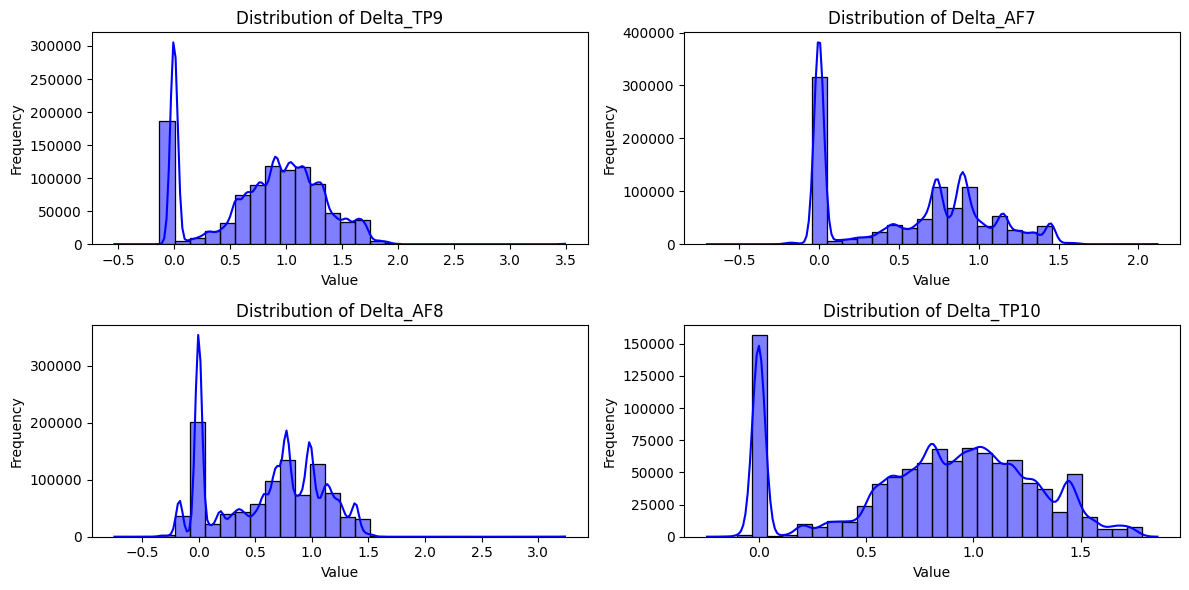

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for EEG channels
channels = ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10']
plt.figure(figsize=(12, 6))

for i, channel in enumerate(channels, 1):
    plt.subplot(2, 2, i)
    sns.histplot(processed_data[channel], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {channel}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [11]:
# Plot stress levels before and after the quiz
if 'Pre_Stress' in processed_data.columns and 'Post_Stress' in processed_data.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=processed_data[['Pre_Stress', 'Post_Stress']])
    plt.title('Stress Levels: Pre-Quiz vs Post-Quiz')
    plt.ylabel('Stress Level (1-10)')
    plt.show()


Numeric Columns for Correlation:
Index(['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8',
       'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10',
       'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X',
       'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8',
       'HSI_TP10', 'Battery'],
      dtype='object')


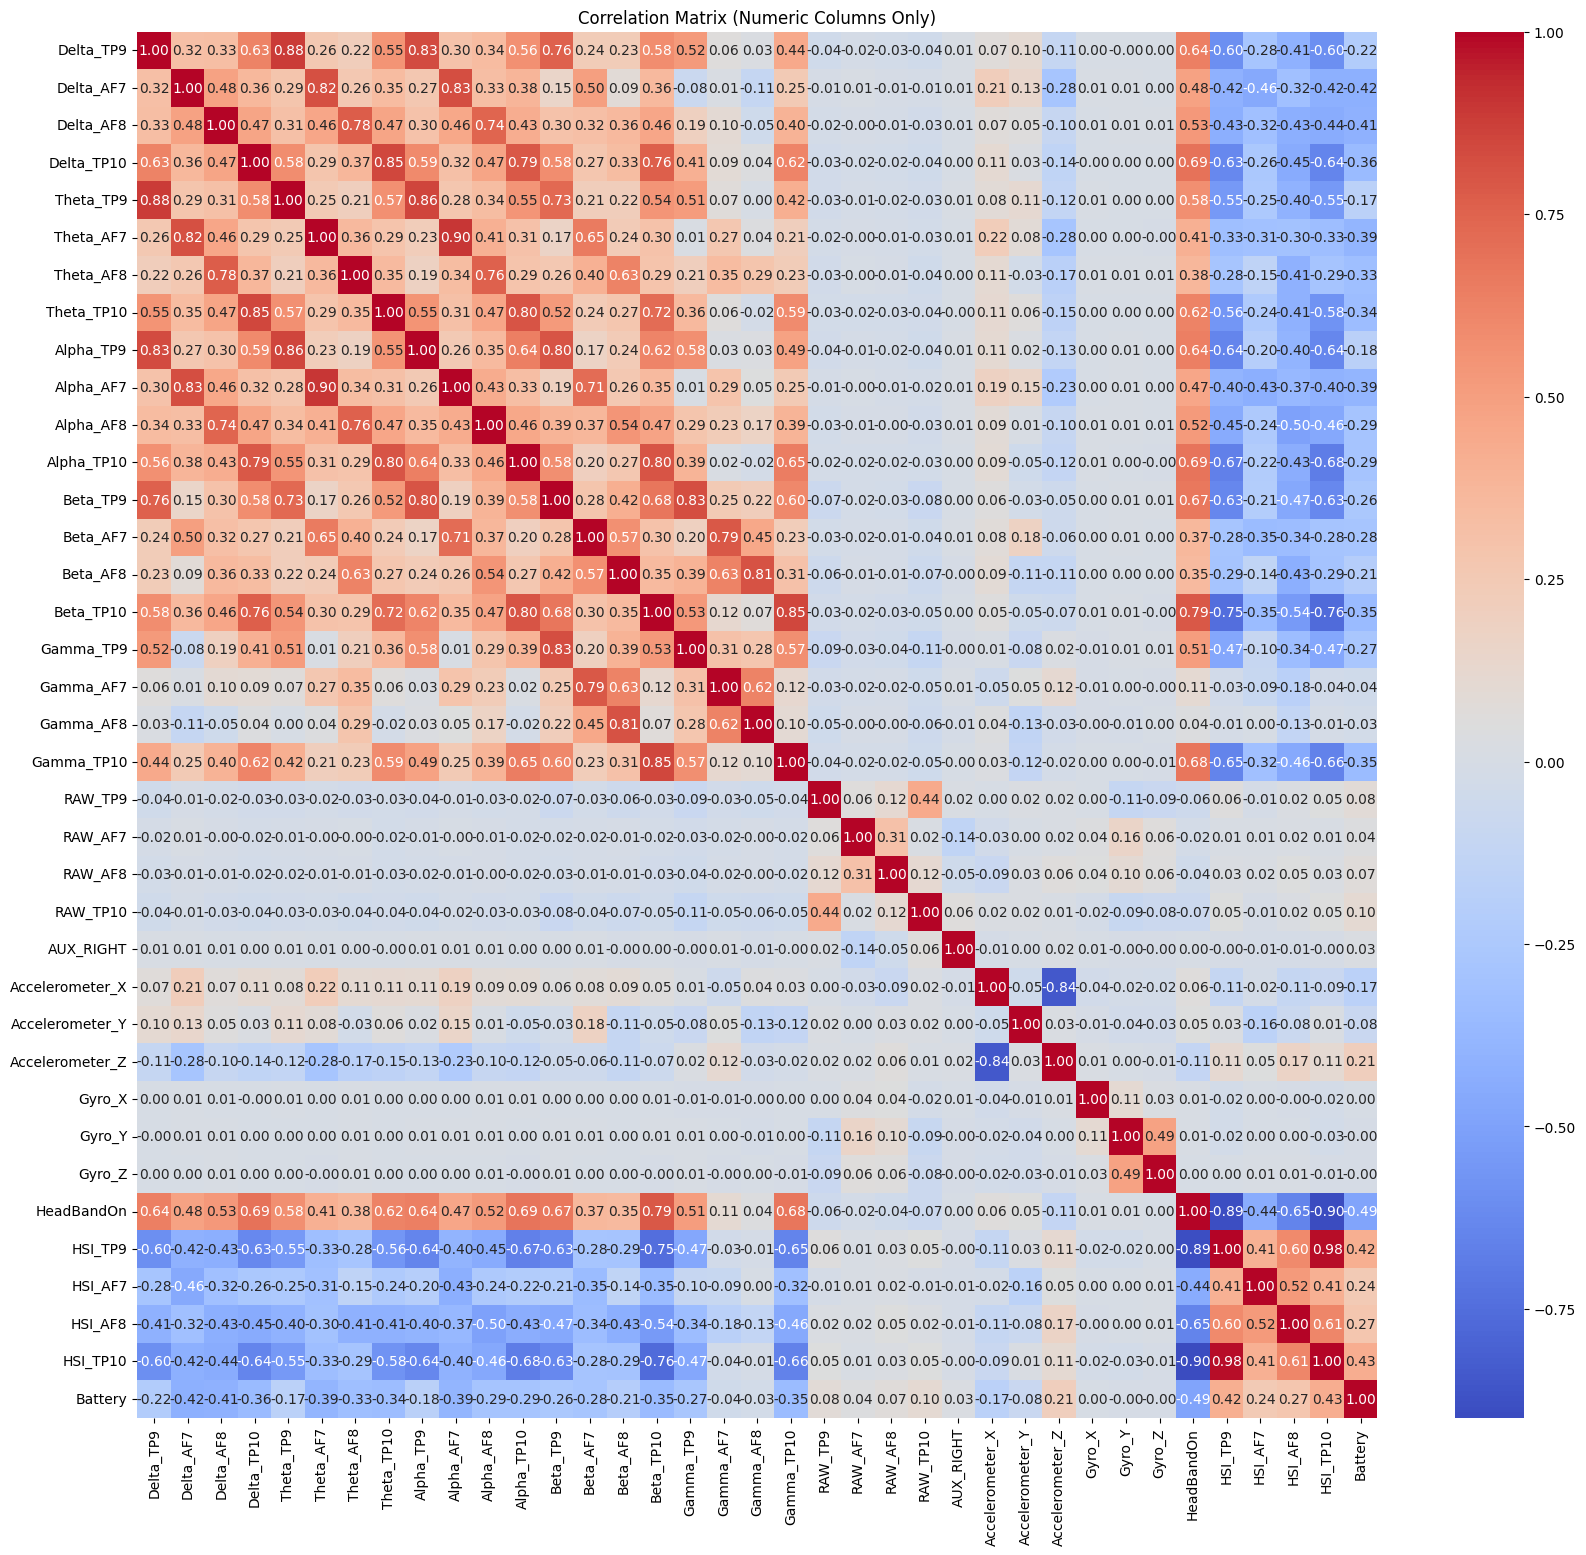

In [14]:
# Select only numeric columns for correlation calculation
numeric_data = processed_data.select_dtypes(include=['float64', 'int64'])

# Check for numeric columns
print("Numeric Columns for Correlation:")
print(numeric_data.columns)

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()


In [15]:
# List of relevant EEG channel columns
eeg_channels = [
    'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
    'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10',
    'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10',
    'Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10',
    'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10'
]

# Filter the dataset to include only relevant EEG channels
eeg_data_filtered = processed_data[eeg_channels]

# Display the filtered dataset
print("Filtered EEG Channel Data:")
print(eeg_data_filtered.head())


Filtered EEG Channel Data:
   Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF7  \
0  -0.042729   0.988683   0.166169    0.175601   0.319686   0.423927   
1  -0.042729   0.988683   0.166169    0.175601   0.319686   0.423927   
2  -0.042729   0.988683   0.166169    0.175601   0.319686   0.423927   
3  -0.042729   0.988683   0.166169    0.175601   0.319686   0.423927   
4  -0.042729   0.988683   0.166169    0.175601   0.319686   0.423927   

   Theta_AF8  Theta_TP10  Alpha_TP9  Alpha_AF7  Alpha_AF8  Alpha_TP10  \
0  -0.353873    0.162132   0.513109   0.561469   0.192005    0.900139   
1  -0.353873    0.162132   0.513109   0.561469   0.192005    0.900139   
2  -0.353873    0.162132   0.513109   0.561469   0.192005    0.900139   
3  -0.353873    0.162132   0.513109   0.561469   0.192005    0.900139   
4  -0.353873    0.162132   0.513109   0.561469   0.192005    0.900139   

   Beta_TP9  Beta_AF7  Beta_AF8  Beta_TP10  Gamma_TP9  Gamma_AF7  Gamma_AF8  \
0  0.575995  0.421127 

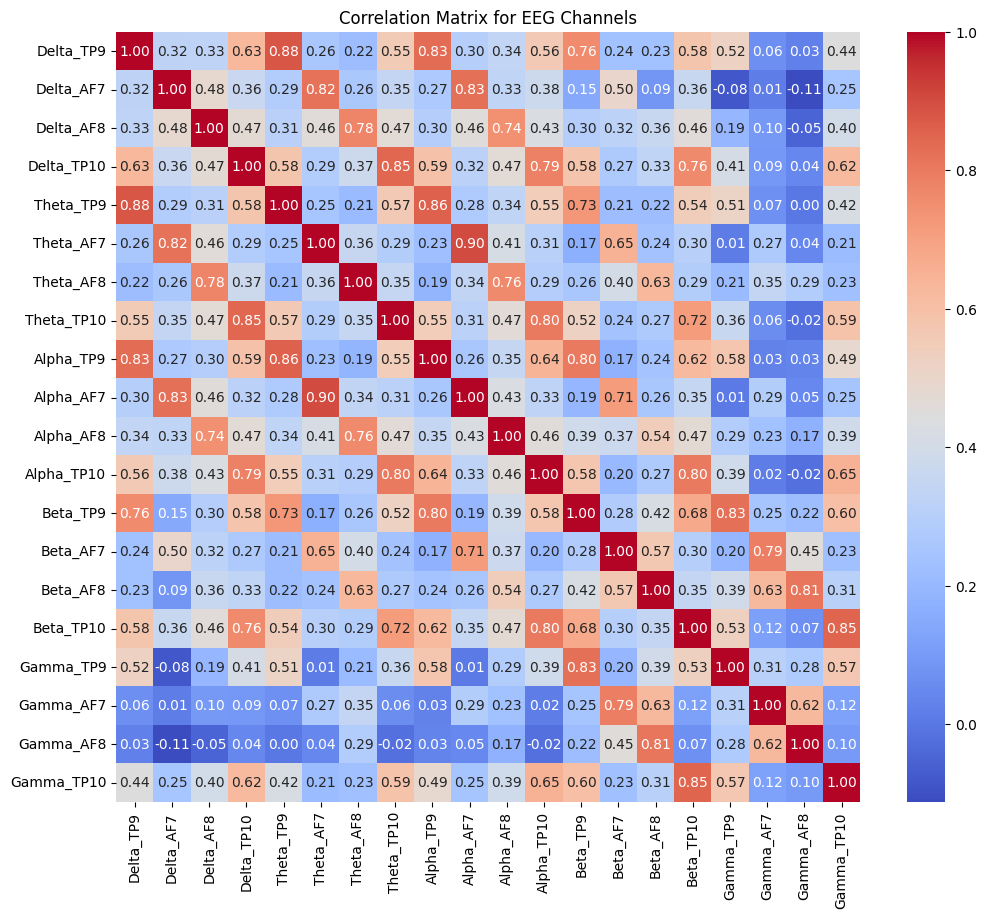

In [16]:
correlation_matrix = eeg_data_filtered.corr()

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for EEG Channels')
plt.show()


# **PCA**

In [18]:
print(eeg_data_filtered.isnull().sum())


Delta_TP9     1825
Delta_AF7     1825
Delta_AF8     1825
Delta_TP10    1825
Theta_TP9     1825
Theta_AF7     1825
Theta_AF8     1825
Theta_TP10    1825
Alpha_TP9     1825
Alpha_AF7     1825
Alpha_AF8     1825
Alpha_TP10    1825
Beta_TP9      1825
Beta_AF7      1825
Beta_AF8      1825
Beta_TP10     1825
Gamma_TP9     1825
Gamma_AF7     1825
Gamma_AF8     1825
Gamma_TP10    1825
dtype: int64


In [19]:
# Impute missing values with the mean of each column
eeg_data_filtered.fillna(eeg_data_filtered.mean(), inplace=True)

# Verify there are no missing values remaining
print(eeg_data_filtered.isnull().sum().sum())  # Should print 0


0


<ipython-input-19-90f636deb0fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_data_filtered.fillna(eeg_data_filtered.mean(), inplace=True)


In [20]:
# Create a copy of the DataFrame to avoid the warning
eeg_data_filtered = processed_data[eeg_channels].copy()

# Impute missing values with the mean
eeg_data_filtered.fillna(eeg_data_filtered.mean(), inplace=True)

# Verify there are no missing values remaining
print(eeg_data_filtered.isnull().sum().sum())  # Should print 0


0


In [21]:
eeg_data_filtered = eeg_data_filtered.assign(**{col: eeg_data_filtered[col].fillna(eeg_data_filtered[col].mean()) for col in eeg_data_filtered.columns})

# Verify there are no missing values remaining
print(eeg_data_filtered.isnull().sum().sum())  # Should print 0


0


In [22]:
eeg_data_filtered = eeg_data_filtered.fillna(eeg_data_filtered.mean())

# Verify there are no missing values remaining
print(eeg_data_filtered.isnull().sum().sum())  # Should print 0


0


In [24]:
# Check for infinity or large values
print("Checking for infinity values:")
print(np.isinf(eeg_data_filtered).sum())

print("Checking for very large values:")
print(eeg_data_filtered.max())


Checking for infinity values:
Delta_TP9      7938
Delta_AF7     37838
Delta_AF8      4269
Delta_TP10     4074
Theta_TP9      7938
Theta_AF7     37838
Theta_AF8      4269
Theta_TP10     4074
Alpha_TP9      7938
Alpha_AF7     37838
Alpha_AF8      4269
Alpha_TP10     4074
Beta_TP9       7938
Beta_AF7      37838
Beta_AF8       4269
Beta_TP10      4074
Gamma_TP9      7938
Gamma_AF7     37838
Gamma_AF8      4269
Gamma_TP10     4074
dtype: int64
Checking for very large values:
Delta_TP9     3.491402
Delta_AF7     2.119322
Delta_AF8     3.237406
Delta_TP10    1.857120
Theta_TP9     3.529081
Theta_AF7     1.643207
Theta_AF8     2.300217
Theta_TP10    1.960202
Alpha_TP9     3.537330
Alpha_AF7     1.370596
Alpha_AF8     2.677409
Alpha_TP10    1.997277
Beta_TP9      2.955609
Beta_AF7      1.150661
Beta_AF8      1.790870
Beta_TP10     1.648421
Gamma_TP9     2.477975
Gamma_AF7     1.267365
Gamma_AF8     1.478655
Gamma_TP10    1.322451
dtype: float64


In [25]:
# Replace infinity values with NaN
eeg_data_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean
eeg_data_filtered.fillna(eeg_data_filtered.mean(), inplace=True)


In [26]:
# Clip extreme values to a maximum threshold
eeg_data_filtered = eeg_data_filtered.clip(lower=-1e6, upper=1e6)


In [27]:
print("Any infinity values remaining?", np.isinf(eeg_data_filtered).any().any())
print("Any NaN values remaining?", eeg_data_filtered.isnull().any().any())
print("Maximum values after cleaning:", eeg_data_filtered.max())


Any infinity values remaining? False
Any NaN values remaining? False
Maximum values after cleaning: Delta_TP9     3.491402
Delta_AF7     2.119322
Delta_AF8     3.237406
Delta_TP10    1.857120
Theta_TP9     3.529081
Theta_AF7     1.643207
Theta_AF8     2.300217
Theta_TP10    1.960202
Alpha_TP9     3.537330
Alpha_AF7     1.370596
Alpha_AF8     2.677409
Alpha_TP10    1.997277
Beta_TP9      2.955609
Beta_AF7      1.150661
Beta_AF8      1.790870
Beta_TP10     1.648421
Gamma_TP9     2.477975
Gamma_AF7     1.267365
Gamma_AF8     1.478655
Gamma_TP10    1.322451
dtype: float64


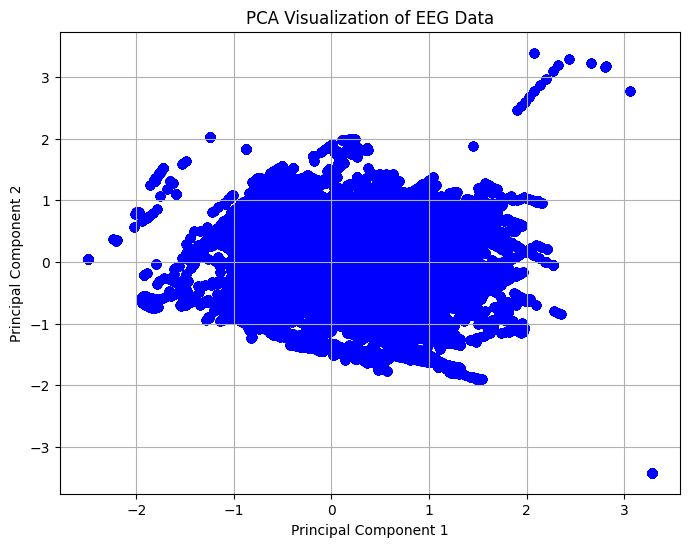

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
pca_data = pca.fit_transform(eeg_data_filtered)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2'])

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.7, color='blue')
plt.title('PCA Visualization of EEG Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [29]:
# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Component 1: {explained_variance[0]:.2f}")
print(f"Explained Variance by Component 2: {explained_variance[1]:.2f}")
print(f"Total Variance Explained: {sum(explained_variance):.2f}")


Explained Variance by Component 1: 0.44
Explained Variance by Component 2: 0.15
Total Variance Explained: 0.60


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


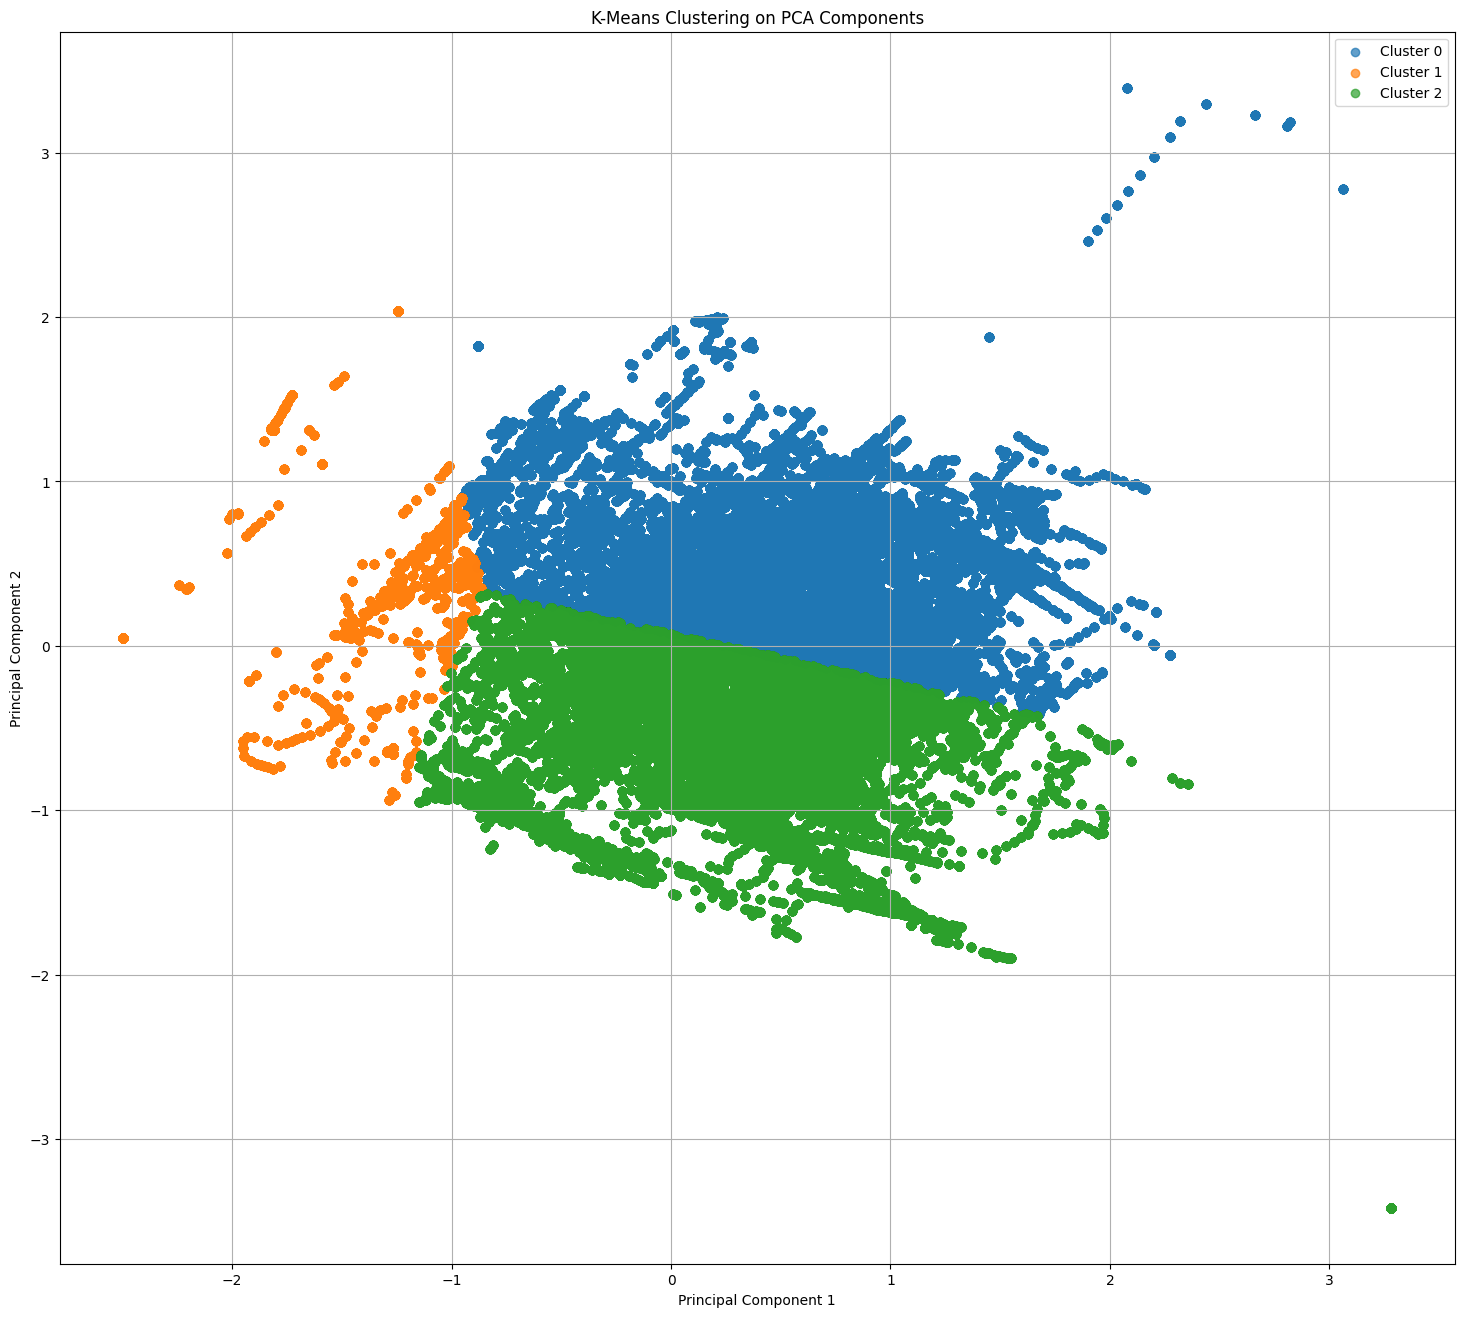

In [31]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add clusters to the PCA DataFrame
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(18, 16))
for cluster in range(3):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Principal Component 1'], cluster_data['Principal Component 2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-Means Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


# **ML PART**

In [33]:
print(processed_data.columns)


Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X',
       'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8',
       'HSI_TP10', 'Battery', 'Elements', 'Student_ID'],
      dtype='object')


In [40]:
print("Columns in processed_data:")
print(processed_data.columns)


Columns in processed_data:
Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X',
       'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8',
       'HSI_TP10', 'Battery', 'Elements', 'Student_ID'],
      dtype='object')


In [41]:
print("Columns in questionnaire_data:")
print(questionnaire_data.columns)


Columns in questionnaire_data:
Index(['Unnamed: 0', 'Student ID', '2022-3-60-056', '2023-2-60-100',
       '2022-3-60-199', '2022-3-60-033', '2022-2-60-144', '2022-2-60-104',
       '2022-2-60-050', '2022-2-60-103', '2023-1-60-174', '2022-3-60-282',
       '2023-1-60-017', '2023-1-60-117', '2022-3-60-255', '2022-3-60-254',
       '2020-2-60-117', '2023-3-60-315', '2022-3-60-326', '2022-3-60-261',
       '2023-1-60-065', '2022-3-60-307', '2022-1-60-274', '2022-3-60-170',
       '2022-3-60-229', '2022-3-60-284', '2023-1-60-147', '2022-3-60-072',
       'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')


In [42]:
# Transpose the questionnaire data
questionnaire_data = questionnaire_data.T

# Reset the index
questionnaire_data.reset_index(inplace=True)

# Rename columns for clarity (adjust based on your structure)
questionnaire_data.columns = questionnaire_data.iloc[0]  # Use the first row as header
questionnaire_data = questionnaire_data[1:]  # Remove the header row from data


In [43]:
print("Restructured Questionnaire Data:")
print(questionnaire_data.head())


Restructured Questionnaire Data:
0     Unnamed: 0  1.0     2.0            3.0  \
1     Student ID  Age  Gender  Year of Study   
2  2022-3-60-056   22    Male            2nd   
3  2023-2-60-100   22    Male            2nd   
4  2022-3-60-199   23    Male            2nd   
5  2022-3-60-033   22    Male            2nd   

0                                   NaN  \
1  Baseline Stress Levels (Before Quiz)   
2                                   NaN   
3                                   NaN   
4                                   NaN   
5                                   NaN   

0                                                4.0  \
1  On a scale of 1 to 10, how stressed do you fee...   
2                                                  5   
3                                                  6   
4                                                  7   
5                                                  1   

0                                               5.0  \
1  How many hours of sleep 

In [44]:
# Rename the column to 'Student_ID' for consistency
questionnaire_data.rename(columns={'Correct Column Name': 'Student_ID'}, inplace=True)  # Replace 'Correct Column Name' with actual column name


In [46]:
print("Columns in restructured questionnaire_data:")
print(questionnaire_data.columns)

print("First few rows of questionnaire_data:")
print(questionnaire_data.head())


Columns in restructured questionnaire_data:
Index(['Unnamed: 0',          1.0,          2.0,          3.0,          nan,
                4.0,          5.0,          6.0,          7.0,          8.0,
                nan,          nan,          nan,          9.0,          nan,
                nan,          nan,          nan,          nan,          nan,
               10.0,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,         11.0,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,         12.0,         13.0,          nan,          nan,
                nan,         14.0,         15.0,          nan,          nan,
                nan,         16.0,          nan,          nan,          nan],
      dtype='object', name=0)
First few rows of questionnaire_data:
0     Unnamed: 0  1.0     2.0            3.0  \
1     Student ID  Age  Gender  Year of Study   
2  2022-3-60-056   22

In [47]:
# Use the first row as the header
questionnaire_data.columns = questionnaire_data.iloc[1]  # Set the second row as column headers
questionnaire_data = questionnaire_data[2:]  # Remove the first two rows (headers and metadata)

# Reset the index
questionnaire_data.reset_index(drop=True, inplace=True)

print("Restructured Questionnaire Data:")
print(questionnaire_data.head())


Restructured Questionnaire Data:
2  2022-3-60-056  22    Male  2nd  NaN  5  1  Yes   1  NaN  ...  \
0  2023-2-60-100  22    Male  2nd  NaN  6  7  Yes   1  NaN  ...   
1  2022-3-60-199  23    Male  2nd  NaN  7  4  Yes   1  NaN  ...   
2  2022-3-60-033  22    Male  2nd  NaN  1  7  Yes   0  NaN  ...   
3  2022-2-60-144  22  Female  2nd  NaN  9  5   No  10  NaN  ...   
4  2022-2-60-104  22  Female  2nd  NaN  8  7   No  10  NaN  ...   

2             NaN  Yes  NaN         NaN     Somewhat likely  NaN  NaN  \
0             NaN  Yes  NaN  Not likely                 NaN  NaN  NaN   
1             NaN  Yes  NaN         NaN  Somewhat satisfied  NaN  NaN   
2             NaN  Yes  NaN         NaN     Somewhat likely  NaN  NaN   
3  Very satisfied  Yes  NaN  Not likely                 NaN  NaN  NaN   
4  Very satisfied  NaN  NaN         NaN     Somewhat likely  NaN  NaN   

2  Not stressed                NaN  NaN  
0           NaN  Somewhat stressed  NaN  
1           NaN  Somewhat stressed  NaN  

In [48]:
print("Columns in questionnaire_data after restructuring:")
print(questionnaire_data.columns)


Columns in questionnaire_data after restructuring:
Index([            '2022-3-60-056',                          22,
                            'Male',                       '2nd',
                               nan,                           5,
                                 1,                       'Yes',
                                 1,                         nan,
                               nan,         'Somewhat prepared',
                               nan,                         nan,
               'Academic pressure',                         nan,
              'Financial concerns',                         nan,
                               nan,                         nan,
                               nan,                         nan,
                       'Headaches',              'Stomachaches',
                               nan,                         nan,
                               nan,                         nan,
                               nan,    

In [50]:
# Reassign the correct headers to the DataFrame
questionnaire_data.columns = questionnaire_data.iloc[0]  # First row as header
questionnaire_data = questionnaire_data[1:]  # Remove the header row from data

# Reset the index
questionnaire_data.reset_index(drop=True, inplace=True)

print("Restructured Questionnaire Data with Correct Headers:")
print(questionnaire_data.head())


Restructured Questionnaire Data with Correct Headers:
0  2023-2-60-100  22    Male  2nd  NaN  6  7  Yes   1  NaN  ...  \
0  2022-3-60-199  23    Male  2nd  NaN  7  4  Yes   1  NaN  ...   
1  2022-3-60-033  22    Male  2nd  NaN  1  7  Yes   0  NaN  ...   
2  2022-2-60-144  22  Female  2nd  NaN  9  5   No  10  NaN  ...   
3  2022-2-60-104  22  Female  2nd  NaN  8  7   No  10  NaN  ...   
4  2022-2-60-050  22  Female  2nd  NaN  5  5   No   1  NaN  ...   

0             NaN  Yes  NaN  Not likely                 NaN  NaN  NaN  \
0             NaN  Yes  NaN         NaN  Somewhat satisfied  NaN  NaN   
1             NaN  Yes  NaN         NaN     Somewhat likely  NaN  NaN   
2  Very satisfied  Yes  NaN  Not likely                 NaN  NaN  NaN   
3  Very satisfied  NaN  NaN         NaN     Somewhat likely  NaN  NaN   
4             NaN  Yes  NaN         NaN     Somewhat likely  NaN  NaN   

0           NaN  Somewhat stressed  NaN  
0           NaN  Somewhat stressed  NaN  
1           NaN  Som

In [52]:
# Promote the first row as column headers
questionnaire_data.columns = questionnaire_data.iloc[0]  # Use the first row as headers
questionnaire_data = questionnaire_data[1:]  # Remove the first row from the data

# Reset the index
questionnaire_data.reset_index(drop=True, inplace=True)

print("Columns after restructuring:")
print(questionnaire_data.columns)


Columns after restructuring:
Index([       '2022-3-60-199',                     23,                 'Male',
                        '2nd',                    nan,                      7,
                            4,                  'Yes',                      1,
                          nan,         'Not prepared',                    nan,
                          nan,                    nan,    'Academic pressure',
              'Family issues',   'Financial concerns',        'Health issues',
       'Social relationships',             'Advising',                    nan,
                          nan,            'Headaches',                    nan,
                          nan,                    nan,                    nan,
                 'Blurry eye',                    nan,                    nan,
                          nan,                    nan,                    nan,
        'Playing video games',                    nan,                    nan,
                       

In [53]:
# Use the first row as the header
questionnaire_data.columns = questionnaire_data.iloc[0]  # Set the first row as column headers
questionnaire_data = questionnaire_data[1:]  # Remove the first row from data

# Reset the index
questionnaire_data.reset_index(drop=True, inplace=True)

print("Columns after restructuring:")
print(questionnaire_data.columns)


Columns after restructuring:
Index([            '2022-3-60-033',                          22,
                            'Male',                       '2nd',
                               nan,                           1,
                                 7,                       'Yes',
                                 0,                         nan,
                    'Not prepared',                         nan,
                               nan,                         nan,
               'Academic pressure',             'Family issues',
              'Financial concerns',                         nan,
                               nan,                  'Advising',
                               nan,                         nan,
                               nan,                         nan,
                 'Rapid heartbeat',                  'Sweating',
                               nan,                         nan,
                               nan,                  'Exercis

In [54]:
print("First few rows of questionnaire_data:")
print(questionnaire_data.head())


First few rows of questionnaire_data:
0  2022-3-60-033  22    Male  2nd  NaN  1  7  Yes   0  NaN  ...  \
0  2022-2-60-144  22  Female  2nd  NaN  9  5   No  10  NaN  ...   
1  2022-2-60-104  22  Female  2nd  NaN  8  7   No  10  NaN  ...   
2  2022-2-60-050  22  Female  2nd  NaN  5  5   No   1  NaN  ...   
3  2022-2-60-103  23  Female  2nd  NaN  7  4  Yes  12  NaN  ...   
4  2023-1-60-174  22  Female  2nd  NaN  7  3  Yes   1  NaN  ...   

0             NaN  Yes  NaN         NaN  Somewhat likely          NaN  NaN  \
0  Very satisfied  Yes  NaN  Not likely              NaN          NaN  NaN   
1  Very satisfied  NaN  NaN         NaN  Somewhat likely          NaN  NaN   
2             NaN  Yes  NaN         NaN  Somewhat likely          NaN  NaN   
3             NaN  Yes  NaN         NaN  Somewhat likely          NaN  NaN   
4             NaN  Yes  NaN         NaN              NaN  Very likely  NaN   

0           NaN  Somewhat stressed  NaN  
0  Not stressed                NaN  NaN  
1  Not

In [55]:
# Rename the first column to 'Student_ID'
questionnaire_data.rename(columns={questionnaire_data.columns[0]: 'Student_ID'}, inplace=True)

# Verify the column renaming
print("Columns in questionnaire_data after renaming:")
print(questionnaire_data.columns)


Columns in questionnaire_data after renaming:
Index([               'Student_ID',                          22,
                            'Male',                       '2nd',
                               nan,                           1,
                                 7,                       'Yes',
                                 0,                         nan,
                    'Not prepared',                         nan,
                               nan,                         nan,
               'Academic pressure',             'Family issues',
              'Financial concerns',                         nan,
                               nan,                  'Advising',
                               nan,                         nan,
                               nan,                         nan,
                 'Rapid heartbeat',                  'Sweating',
                               nan,                         nan,
                               nan,         

In [56]:
# Convert Student_ID to string in both DataFrames
processed_data['Student_ID'] = processed_data['Student_ID'].astype(str)
questionnaire_data['Student_ID'] = questionnaire_data['Student_ID'].astype(str)


In [58]:
# List of unique Student_IDs in both DataFrames
processed_ids = set(processed_data['Student_ID'].unique())
questionnaire_ids = set(questionnaire_data['Student_ID'].unique())

# Find overlapping IDs
common_ids = processed_ids.intersection(questionnaire_ids)
print(f"Number of common Student_IDs: {len(common_ids)}")
print("Sample of common IDs:", list(common_ids)[:10])


Number of common Student_IDs: 0
Sample of common IDs: []


In [57]:
# Merge processed_data with questionnaire_data
merged_data = processed_data.merge(questionnaire_data, on='Student_ID', how='inner')

# Display the merged data
print("Merged Data:")
print(merged_data.head())


Merged Data:
Empty DataFrame
Columns: [TimeStamp, Delta_TP9, Delta_AF7, Delta_AF8, Delta_TP10, Theta_TP9, Theta_AF7, Theta_AF8, Theta_TP10, Alpha_TP9, Alpha_AF7, Alpha_AF8, Alpha_TP10, Beta_TP9, Beta_AF7, Beta_AF8, Beta_TP10, Gamma_TP9, Gamma_AF7, Gamma_AF8, Gamma_TP10, RAW_TP9, RAW_AF7, RAW_AF8, RAW_TP10, AUX_RIGHT, Accelerometer_X, Accelerometer_Y, Accelerometer_Z, Gyro_X, Gyro_Y, Gyro_Z, HeadBandOn, HSI_TP9, HSI_AF7, HSI_AF8, HSI_TP10, Battery, Elements, Student_ID, 22, Male, 2nd, nan, 1, 7, Yes, 0, nan, Not prepared, nan, nan, nan, Academic pressure, Family issues, Financial concerns, nan, nan, Advising, nan, nan, nan, nan, Rapid heartbeat, Sweating, nan, nan, nan, Exercise, nan, Talking to friends/family, Watching TV/Movies, Playing video games, nan, nan, 2, nan, Not satisfied, nan, nan, Yes, nan, nan, Somewhat likely, nan, nan, nan, Somewhat stressed, nan]
Index: []

[0 rows x 89 columns]


In [59]:
print("Sample of Student_IDs in processed_data:")
print(processed_data['Student_ID'].head(10))

print("Sample of Student_IDs in questionnaire_data:")
print(questionnaire_data['Student_ID'].head(10))


Sample of Student_IDs in processed_data:
0    tania-017
1    tania-017
2    tania-017
3    tania-017
4    tania-017
5    tania-017
6    tania-017
7    tania-017
8    tania-017
9    tania-017
Name: Student_ID, dtype: object
Sample of Student_IDs in questionnaire_data:
0    2022-2-60-144
1    2022-2-60-104
2    2022-2-60-050
3    2022-2-60-103
4    2023-1-60-174
5    2022-3-60-282
6    2023-1-60-017
7    2023-1-60-117
8    2022-3-60-255
9    2022-3-60-254
Name: Student_ID, dtype: object


In [60]:
processed_data['Student_ID'] = processed_data['Student_ID'].str.strip()
questionnaire_data['Student_ID'] = questionnaire_data['Student_ID'].str.strip()


In [61]:
processed_data['Student_ID'] = processed_data['Student_ID'].str.lower()
questionnaire_data['Student_ID'] = questionnaire_data['Student_ID'].str.lower()


In [62]:
processed_data['Student_ID'] = processed_data['Student_ID'].str.replace('-', '')
questionnaire_data['Student_ID'] = questionnaire_data['Student_ID'].str.replace('-', '')


In [64]:
print("Processed Data Student_IDs:")
print(processed_data['Student_ID'].unique())

print("Questionnaire Data Student_IDs:")
print(questionnaire_data['Student_ID'].unique())


Processed Data Student_IDs:
['tania017' 'shaptashi326' 'sababa229' 'sadruzzahan147' 'afifa174'
 'raqibul261' 'shafkat035' 'rifat056' 'tanvir072' 'm' 'jubaiya255'
 'dip307' 'zerin282' 'monia170' 'israt050' 'nipa254' 'jannatul103'
 'kotha284' 'syeda315' 'nila104' 'sumon117' 'malek117' 'sakib274'
 'tanweer199' 'toyabur065' 'orni144']
Questionnaire Data Student_IDs:
['2022260144' '2022260104' '2022260050' '2022260103' '2023160174'
 '2022360282' '2023160017' '2023160117' '2022360255' '2022360254'
 '2020260117' '2023360315' '2022360326' '2022360261' '2023160065'
 '2022360307' '2022160274' '2022360170' '2022360229' '2022360284'
 '2023160147' '2022360072' 'unnamed: 28' 'unnamed: 29']


In [66]:
!pip install fuzzywuzzy

In [68]:
# Merge using the mapped IDs
merged_data = processed_data.merge(
    questionnaire_data,
    left_on='Mapped_Student_ID',
    right_on='Student_ID',
    how='inner'
)

print("Merged Data:")
print(merged_data.head())


KeyError: 'Mapped_Student_ID'

In [70]:
# Install python-Levenshtein for faster fuzzy matching
!pip install python-Levenshtein --quiet

from fuzzywuzzy import process
from joblib import Parallel, delayed
import pandas as pd

# Step 1: Extract Numeric IDs to Reduce Matching Space
processed_data['Numeric_ID'] = processed_data['Student_ID'].str.extract('(\d+)', expand=False)
questionnaire_data['Numeric_ID'] = questionnaire_data['Student_ID'].str.extract('(\d+)', expand=False)

# Step 2: Deduplicate IDs in questionnaire_data to avoid redundant comparisons
questionnaire_data = questionnaire_data.drop_duplicates(subset=['Student_ID'])

# Step 3: Define a Fuzzy Matching Function
def match_id(processed_id, numeric_id, questionnaire_data):
    # Filter questionnaire IDs based on numeric match
    potential_matches = questionnaire_data[questionnaire_data['Numeric_ID'] == numeric_id]['Student_ID']

    # Perform fuzzy matching on filtered set
    if not potential_matches.empty:
        best_match = process.extractOne(processed_id, potential_matches)
        return processed_id, best_match[0] if best_match else None
    else:
        return processed_id, None

# Step 4: Run Parallel Processing for Fuzzy Matching
results = Parallel(n_jobs=-1)(
    delayed(match_id)(processed_id, numeric_id, questionnaire_data)
    for processed_id, numeric_id in zip(processed_data['Student_ID'], processed_data['Numeric_ID'])
)

# Step 5: Convert Results to a Mapping Dictionary
id_mapping = {processed_id: best_match for processed_id, best_match in results if best_match}

# Step 6: Add Mapped IDs to Processed Data and Ensure String Type
processed_data['Mapped_Student_ID'] = processed_data['Student_ID'].map(id_mapping).astype(str)
questionnaire_data['Student_ID'] = questionnaire_data['Student_ID'].astype(str)

# Step 7: Merge Processed and Questionnaire Data Using Mapped IDs
merged_data = processed_data.merge(
    questionnaire_data,
    left_on='Mapped_Student_ID',
    right_on='Student_ID',
    how='inner'
)

# Step 8: Display Results
print("ID Mapping:")
print(id_mapping)
print("\nMerged Data:")
print(merged_data.head())


ID Mapping:
{}

Merged Data:
Empty DataFrame
Columns: [TimeStamp, Delta_TP9, Delta_AF7, Delta_AF8, Delta_TP10, Theta_TP9, Theta_AF7, Theta_AF8, Theta_TP10, Alpha_TP9, Alpha_AF7, Alpha_AF8, Alpha_TP10, Beta_TP9, Beta_AF7, Beta_AF8, Beta_TP10, Gamma_TP9, Gamma_AF7, Gamma_AF8, Gamma_TP10, RAW_TP9, RAW_AF7, RAW_AF8, RAW_TP10, AUX_RIGHT, Accelerometer_X, Accelerometer_Y, Accelerometer_Z, Gyro_X, Gyro_Y, Gyro_Z, HeadBandOn, HSI_TP9, HSI_AF7, HSI_AF8, HSI_TP10, Battery, Elements, Student_ID_x, Numeric_ID_x, Mapped_Student_ID, Student_ID_y, 22, Male, 2nd, nan, 1, 7, Yes, 0, nan, Not prepared, nan, nan, nan, Academic pressure, Family issues, Financial concerns, nan, nan, Advising, nan, nan, nan, nan, Rapid heartbeat, Sweating, nan, nan, nan, Exercise, nan, Talking to friends/family, Watching TV/Movies, Playing video games, nan, nan, 2, nan, Not satisfied, nan, nan, Yes, nan, nan, Somewhat likely, nan, nan, nan, Somewhat stressed, nan, Numeric_ID_y]
Index: []

[0 rows x 93 columns]


In [71]:
print("Processed Data Numeric_IDs:")
print(processed_data[['Student_ID', 'Numeric_ID']].head())

print("\nQuestionnaire Data Numeric_IDs:")
print(questionnaire_data[['Student_ID', 'Numeric_ID']].head())


Processed Data Numeric_IDs:
  Student_ID Numeric_ID
0   tania017        017
1   tania017        017
2   tania017        017
3   tania017        017
4   tania017        017

Questionnaire Data Numeric_IDs:
0  Student_ID  Numeric_ID
0  2022260144  2022260144
1  2022260104  2022260104
2  2022260050  2022260050
3  2022260103  2022260103
4  2023160174  2023160174


In [74]:
from fuzzywuzzy import process
from joblib import Parallel, delayed

# Define a Fuzzy Matching Function Without Numeric Filtering
def match_id(processed_id, questionnaire_ids):
    # Perform fuzzy matching on all questionnaire IDs
    best_match = process.extractOne(processed_id, questionnaire_ids)
    return processed_id, best_match[0] if best_match else None

# Run Fuzzy Matching Directly
questionnaire_ids = questionnaire_data['Student_ID'].tolist()
results = Parallel(n_jobs=-1)(
    delayed(match_id)(processed_id, questionnaire_ids)
    for processed_id in processed_data['Student_ID']
)

# Convert Results to a Mapping Dictionary
id_mapping = {processed_id: best_match for processed_id, best_match in results if best_match}

# Add Mapped IDs to Processed Data
processed_data['Mapped_Student_ID'] = processed_data['Student_ID'].map(id_mapping)

# Display the Mapping
print("ID Mapping:")
print(id_mapping)

# Merge the DataFrames Using Mapped IDs
merged_data = processed_data.merge(
    questionnaire_data,
    left_on='Mapped_Student_ID',
    right_on='Student_ID',
    how='inner'
)


# Assign Sequential IDs
processed_data['Sequential_ID'] = range(1, len(processed_data) + 1)
questionnaire_data['Sequential_ID'] = range(1, len(questionnaire_data) + 1)

# Merge Using Sequential IDs
merged_data = processed_data.merge(
    questionnaire_data,
    on='Sequential_ID',
    how='inner'
)

print("\nMerged Data:")
print(merged_data.head())


ID Mapping:
{'tania017': '2023160174', 'shaptashi326': '2022360326', 'sababa229': '2022360229', 'sadruzzahan147': '2023160147', 'afifa174': '2023160174', 'raqibul261': '2022260144', 'shafkat035': '2022360255', 'rifat056': '2022260144', 'tanvir072': '2022360072', 'm': 'unnamed: 28', 'jubaiya255': '2022360255', 'dip307': '2023160174', 'zerin282': '2022360282', 'monia170': '2022360170', 'israt050': '2022260050', 'nipa254': '2022360254', 'jannatul103': '2022260103', 'kotha284': '2022360284', 'syeda315': '2023360315', 'nila104': '2022260104', 'sumon117': '2023160174', 'malek117': '2023160174', 'sakib274': '2023160174', 'tanweer199': 'unnamed: 29', 'toyabur065': '2022260050', 'orni144': '2022260144'}

Merged Data:
                 TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0  2024-09-17 18:05:21.442  -0.042729   0.988683   0.166169    0.175601   
1  2024-09-17 18:05:21.443  -0.042729   0.988683   0.166169    0.175601   
2  2024-09-17 18:05:21.443  -0.042729   0.988683   0.1661

In [75]:
# Display the first few rows
print(merged_data.head())

# Check the shape of the merged DataFrame
print(f"Merged Data Shape: {merged_data.shape}")


                 TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0  2024-09-17 18:05:21.442  -0.042729   0.988683   0.166169    0.175601   
1  2024-09-17 18:05:21.443  -0.042729   0.988683   0.166169    0.175601   
2  2024-09-17 18:05:21.443  -0.042729   0.988683   0.166169    0.175601   
3  2024-09-17 18:05:21.444  -0.042729   0.988683   0.166169    0.175601   
4  2024-09-17 18:05:21.444  -0.042729   0.988683   0.166169    0.175601   

   Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...  Yes  NaN  \
0   0.319686   0.423927  -0.353873    0.162132   0.513109  ...  Yes  NaN   
1   0.319686   0.423927  -0.353873    0.162132   0.513109  ...  NaN  NaN   
2   0.319686   0.423927  -0.353873    0.162132   0.513109  ...  Yes  NaN   
3   0.319686   0.423927  -0.353873    0.162132   0.513109  ...  Yes  NaN   
4   0.319686   0.423927  -0.353873    0.162132   0.513109  ...  Yes  NaN   

          NaN  Somewhat likely          NaN  NaN           NaN  \
0  Not likely             

In [76]:
# Drop unnecessary columns
merged_data_cleaned = merged_data.drop(columns=['Numeric_ID_y', 'NaN', 'Mapped_Student_ID'], errors='ignore')

# Display the cleaned DataFrame
print("Cleaned Merged Data:")
print(merged_data_cleaned.head())


Cleaned Merged Data:
                 TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0  2024-09-17 18:05:21.442  -0.042729   0.988683   0.166169    0.175601   
1  2024-09-17 18:05:21.443  -0.042729   0.988683   0.166169    0.175601   
2  2024-09-17 18:05:21.443  -0.042729   0.988683   0.166169    0.175601   
3  2024-09-17 18:05:21.444  -0.042729   0.988683   0.166169    0.175601   
4  2024-09-17 18:05:21.444  -0.042729   0.988683   0.166169    0.175601   

   Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...  \
0   0.319686   0.423927  -0.353873    0.162132   0.513109  ...   
1   0.319686   0.423927  -0.353873    0.162132   0.513109  ...   
2   0.319686   0.423927  -0.353873    0.162132   0.513109  ...   
3   0.319686   0.423927  -0.353873    0.162132   0.513109  ...   
4   0.319686   0.423927  -0.353873    0.162132   0.513109  ...   

              NaN  Yes  NaN         NaN  Somewhat likely          NaN  NaN  \
0  Very satisfied  Yes  NaN  Not likely              

In [78]:
merged_data_cleaned.fillna('N/A', inplace=True)
merged_data_cleaned.dropna(inplace=True)


In [80]:
# Save to CSV
merged_data_cleaned.to_csv('/content/drive/MyDrive/CSE488_project/Stress/merged_data.csv', index=False)
print("Merged data saved to 'merged_data.csv'")


Merged data saved to 'merged_data.csv'


In [82]:
print("Columns in merged_data_cleaned:")
print(merged_data_cleaned.columns)


Columns in merged_data_cleaned:
Index([                'TimeStamp',                 'Delta_TP9',
                       'Delta_AF7',                 'Delta_AF8',
                      'Delta_TP10',                 'Theta_TP9',
                       'Theta_AF7',                 'Theta_AF8',
                      'Theta_TP10',                 'Alpha_TP9',
                       'Alpha_AF7',                 'Alpha_AF8',
                      'Alpha_TP10',                  'Beta_TP9',
                        'Beta_AF7',                  'Beta_AF8',
                       'Beta_TP10',                 'Gamma_TP9',
                       'Gamma_AF7',                 'Gamma_AF8',
                      'Gamma_TP10',                   'RAW_TP9',
                         'RAW_AF7',                   'RAW_AF8',
                        'RAW_TP10',                 'AUX_RIGHT',
                 'Accelerometer_X',           'Accelerometer_Y',
                 'Accelerometer_Z',                    'Gy

In [83]:
# Select columns that exist
stress_data = merged_data_cleaned[['Somewhat stressed', 'Somewhat likely']]
print(stress_data.describe())


       Somewhat stressed  Somewhat likely
count                 24               24
unique                 2                2
top                  N/A  Somewhat likely
freq                  13               13


In [84]:
# Rename columns for clarity if needed
merged_data_cleaned.rename(columns={'Not satisfied': 'Not stressed'}, inplace=True)

# Retry selection
stress_data = merged_data_cleaned[['Somewhat stressed', 'Not stressed', 'Somewhat likely']]
print(stress_data.describe())


       Somewhat stressed Not stressed  Somewhat likely
count                 24           24               24
unique                 2            2                2
top                  N/A          N/A  Somewhat likely
freq                  13           20               13


In [85]:
# Strip leading/trailing spaces
merged_data_cleaned.columns = merged_data_cleaned.columns.str.strip()

# Retry selection
stress_data = merged_data_cleaned[['Somewhat stressed', 'Somewhat likely']]
print(stress_data.describe())


       Somewhat stressed  Somewhat likely
count                 24               24
unique                 2                2
top                  N/A  Somewhat likely
freq                  13               13


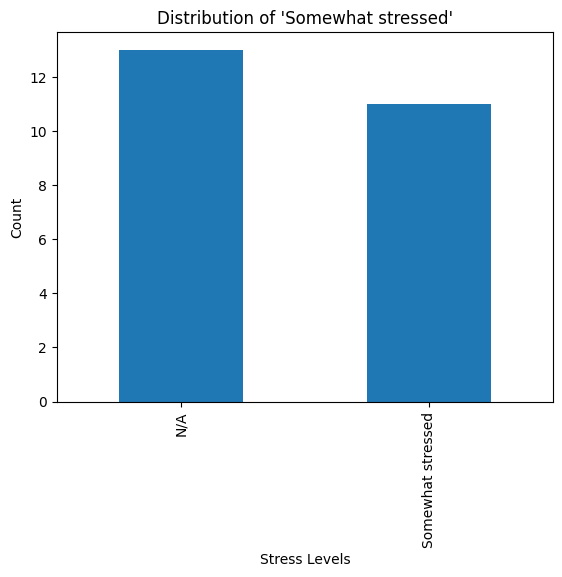

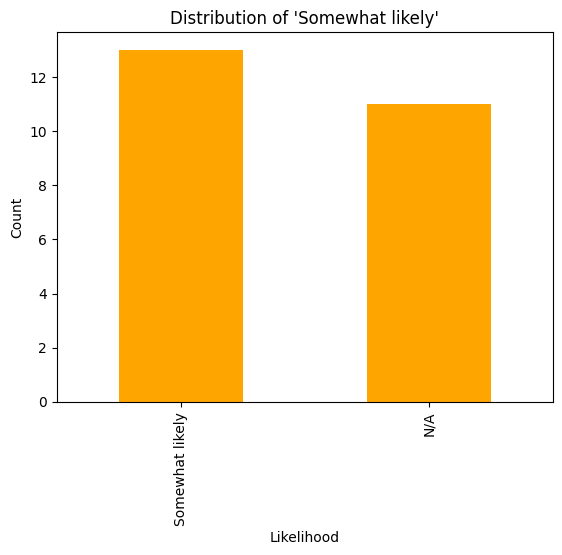

In [87]:
import matplotlib.pyplot as plt

# Bar plot for 'Somewhat stressed'
stress_data['Somewhat stressed'].value_counts().plot(kind='bar')
plt.title("Distribution of 'Somewhat stressed'")
plt.xlabel("Stress Levels")
plt.ylabel("Count")
plt.show()

# Bar plot for 'Somewhat likely'
stress_data['Somewhat likely'].value_counts().plot(kind='bar', color='orange')
plt.title("Distribution of 'Somewhat likely'")
plt.xlabel("Likelihood")
plt.ylabel("Count")
plt.show()


In [89]:
stress_data.to_csv('/content/drive/MyDrive/CSE488_project/Stress/stress_data_subset.csv', index=False)
print("Subset data saved to 'stress_data_subset.csv'")


Subset data saved to 'stress_data_subset.csv'


In [90]:
# Detailed summary of the selected columns
print(stress_data.describe(include='all'))


       Somewhat stressed  Somewhat likely
count                 24               24
unique                 2                2
top                  N/A  Somewhat likely
freq                  13               13


In [91]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Prepare PCA features
# Assuming `eeg_data_filtered` contains the numeric EEG features
eeg_features = eeg_data_filtered.select_dtypes(include='number')  # Ensure numeric features only

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_data = pca.fit_transform(eeg_features)

# Step 2: Define target variable
# Replace 'Theta_TP10' with the column corresponding to your stress label or target
y = processed_data['Theta_TP10']  # Replace with your actual target column

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


ValueError: Input y contains NaN.

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Prepare data
X = pca_data  # PCA features
y = processed_data['Theta_TP10']  # Replace with your stress label column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


ValueError: Input y contains NaN.